In [1]:
from sympy import *
from dtumathtools import *
#from august import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

https://www.youtube.com/watch?v=FQgG9tPZ-I4&t=2111s
https://www.youtube.com/watch?v=cD41LXKSyVU&list=PLOr3fZwA0ZzIIXOFcY5t6Zk1PxhhzTrvX&index=10

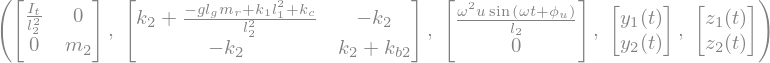

In [2]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

M, K, ft, yt, zt

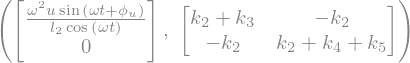

In [3]:
k2, k3, k4, k5 = symbols('k_2 k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_re = re(f * (cos(w*t) + I*sin(w*t)))
f_sol = solve([Eq(f_re[0], ft[0]), Eq(f_re[1], ft[1])], [f1, f2])
f_til = f.subs(f_sol)
K_til = K + FFHM
f_til, K_til

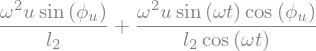

In [4]:
f_til[0].expand(trig=True)

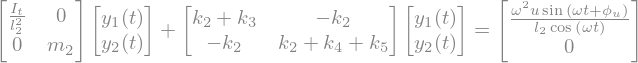

In [5]:
diff_eq = Eq(Add(MatMul(M,yt), MatMul(K_til,yt), evaluate=False), f_til)
diff_eq

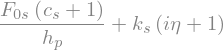

In [6]:
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
kk

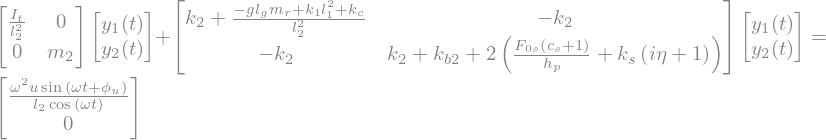

In [7]:
diff_eq.subs({k3: kk3, k4: kb2, k5: Mul(2,kk, evaluate=False)})

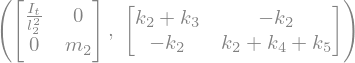

In [8]:
M, K_til

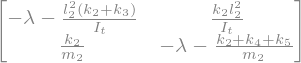

In [9]:
la = symbols('lambda')
A = - M.inv() * K_til
AE = A - eye(2) * la
AE

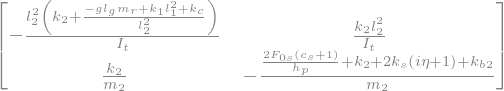

In [10]:
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A_func

# 4.2 Omskrives til komplekst

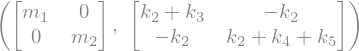

In [12]:
m1_, m2_, la_ = symbols('m_1 m_2 lambda')
M = Matrix([[m1_, 0],[0, m2_]])
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4 + k5]])
M, K

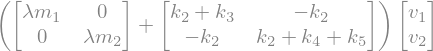

In [13]:
v1, v2 = symbols('v_1 v_2')
V = Matrix([v1, v2])
Mul(MatAdd(la_ * M, K), V, evaluate=False)

4.4

In [81]:
mydict = {g:9.81,kc:0.7,u:1.48*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}
v30 = {ks:0.83, eta:33, Fs0:5.2}
v50 = {ks:0.995, eta:21, Fs0:8}
v70 = {ks:1.37, eta:10.5, Fs0:9.65}
v30, v50, v70

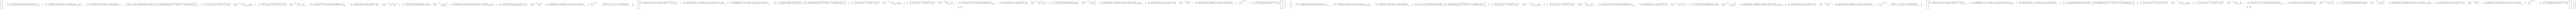

In [79]:
A_func.subs(mydict).subs().eigenvects()

In [104]:
la_sol30 = list(A_func.subs(mydict).subs(v30).eigenvals().keys())
la_sol50 = list(A_func.subs(mydict).subs(v50).eigenvals().keys())
la_sol70 = list(A_func.subs(mydict).subs(v70).eigenvals().keys())
la_sol30, la_sol50, la_sol70

4.5

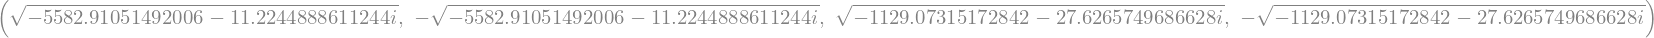

In [105]:
la11, la12, la21, la22 = sqrt(la_sol30[0]), -sqrt(la_sol30[0]), sqrt(la_sol30[1]), -sqrt(la_sol30[1])
la11, la12, la21, la22

In [106]:
xi11_30 = - re(la11)/abs(la11)
xi12_30 = - re(la12)/abs(la12)
xi21_30 = - re(la21)/abs(la21)
xi22_30 = - re(la22)/abs(la22)
xi11_30, xi12_30, xi21_30, xi22_30

In [107]:
wn12 = abs(sqrt(la12))
wn22 = abs(sqrt(la22))
wn12, wn22

In [108]:
wd12 = abs(im(sqrt(la12)))
wd22 = abs(im(sqrt(la22)))
wd12, wd22

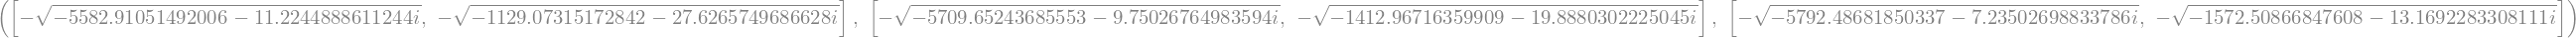

In [109]:
la30 = [-sqrt(la_sol30[0]), -sqrt(la_sol30[1])]
la50 = [-sqrt(la_sol50[0]), -sqrt(la_sol50[1])]
la70 = [-sqrt(la_sol70[0]), -sqrt(la_sol70[1])]
la30, la50, la70

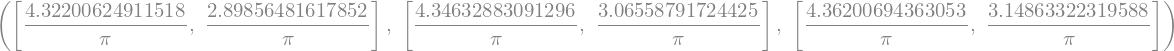

In [113]:
xi30 = [- re(la30[0])/abs(la30[0]), - re(la30[1])/abs(la30[1])]
xi50 = [- re(la50[0])/abs(la50[0]), - re(la50[1])/abs(la50[1])]
xi70 = [- re(la70[0])/abs(la70[0]), - re(la70[1])/abs(la70[1])]
wn30hz = [abs(sqrt(la30[0]))/(2*pi), abs(sqrt(la30[1]))/(2*pi)]
wn50hz = [abs(sqrt(la50[0]))/(2*pi), abs(sqrt(la50[1]))/(2*pi)]
wn70hz = [abs(sqrt(la70[0]))/(2*pi), abs(sqrt(la70[1]))/(2*pi)]
wn30hz, wn50hz, wn70hz 

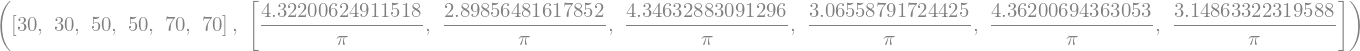

In [114]:
x = [30, 30, 50, 50, 70, 70]
y = [wn30hz[0] ,wn30hz[1], wn50hz[0], wn50hz[1], wn70hz[0], wn70hz[1]]
x, y

In [115]:
x_xi = [30, 30, 50, 50, 70, 70]
y_xi = [xi30[0], xi30[1], xi50[0], xi50[1], xi70[0], xi70[1]]
x_xi, y_xi

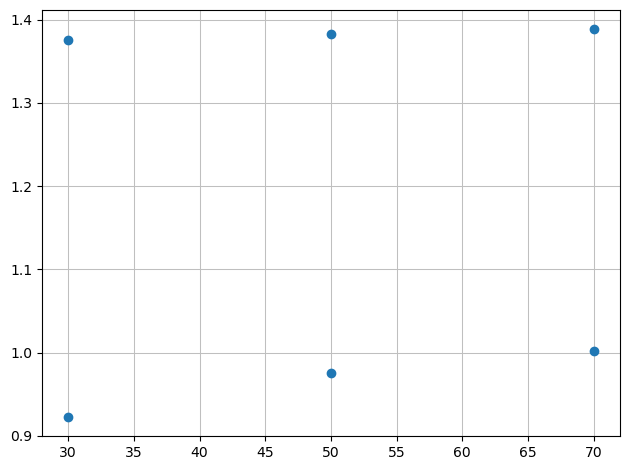

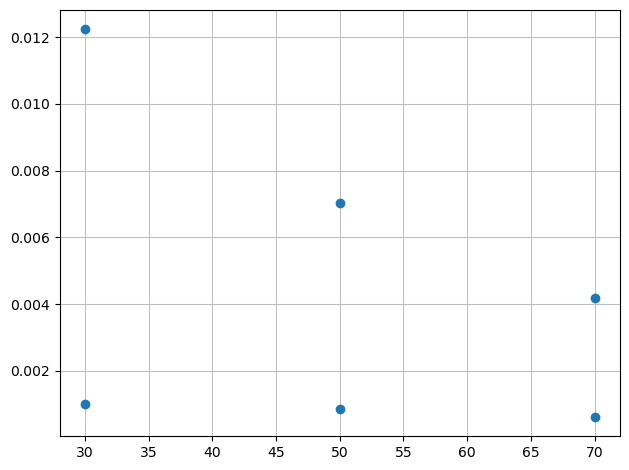

In [116]:
dtuplot.scatter(x, y)
dtuplot.scatter(x_xi, y_xi)